## Hand Written Digits Classification 
here we're classifying handwritten digits using deep neural network. The digits are first input into the network and the network is then trained to recognize the digits. The network is then able to classify the digits into one of the predefined classes.

<img src = "digits_nn.jpg" width = "700px" height = "450px"></img>

In [35]:
# Required libraries...
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Let's first load the hand written digits from keras datasets:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# To see the lenght of x_train:
len(x_train)

60000

In [4]:
# To check the lenght of x_test
len(x_test)

10000

In [6]:
# The shape of single image is:
x_train[0].shape

(28, 28)

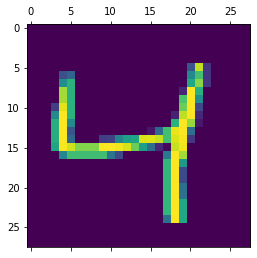

In [7]:
# To display a specific image, so we use matshow function from matplolib library:
plt.matshow(x_train[2])

In [9]:
# The next step is scalling the data which has more effect on model accuracy. So to scall the values, as we know that each
# individual value is in range [0 to 255], so if we divide this whole array into 255, then it will be scalled from 0 to 1.
x_train = x_train / 255
x_test = x_test / 255

In [10]:
# Each image is represented in 28*28 2D array, to check:
x_train.shape

(60000, 28, 28)

In [12]:
# So we need to flatten the 2D array into single dimension array, for that we do as follow:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [13]:
# Now if we check the shape of dataset, we see that it's single dimension array:
x_train_flattened.shape

(60000, 784)

In [15]:
# Now we create a simple neural network which has just two layers (input and output). The way we create it, we call sequential() from keras. Sequential means that we have a stack of sequential layers in my neural network.
# So sequential accept every layer as one element, so the first element here is input which is dense (every neuron is connected with each of the neuron of the next layer). Then we define the input shape (784) and the output shape is 10.
# So in this way we're defining both input and output layers. The next argument is activation function which is 'sigmoid'.
# In the next step we compile our model and we pass a bunch of parameters. The parameters will be coverd in the feature videos.
# Next we trained the model.

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4678 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9259


In [16]:
# As we see as time goes the model accuracy is getting better and the loss become smaller.
# Now to test the model on test data, we do as follow:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2702 - accuracy: 0.9255


[0.2701582908630371, 0.9254999756813049]

In [29]:
# To see the weights for a single input value which are assigned for 10 categories at the output layer: 
y_predicted = model.predict(x_test_flattened)
y_predicted[100]

313/313 [==============================] - 0s 1ms/step


array([4.1336385e-03, 3.5731204e-02, 4.3786246e-01, 2.4826406e-02,
       1.2898204e-02, 1.1649150e-03, 9.7678900e-01, 1.2469687e-03,
       2.5791619e-02, 8.4575574e-04], dtype=float32)

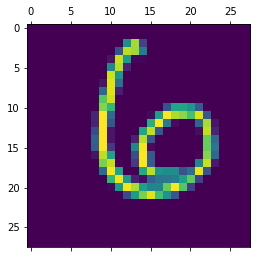

In [30]:
# Now to plot that specific input:
plt.matshow(x_test[100])

In [31]:
# And using numpy argmax function we can predict the actual value of that specific model by the trained model: 
np.argmax(y_predicted[100])

6

In [33]:
# To plot the model using confusion matrix:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    4,   10,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   13,  916,   18,    9,    2,   15,   10,   41,    2],
       [   4,    0,   17,  926,    0,   19,    5,   12,   20,    7],
       [   1,    1,    2,    1,  925,    0,   15,    3,    9,   25],
       [  10,    3,    1,   41,   11,  755,   22,    8,   34,    7],
       [   7,    3,    3,    1,    7,    5,  929,    2,    1,    0],
       [   1,    6,   20,    8,    7,    0,    0,  954,    3,   29],
       [   7,   12,    5,   23,    9,   19,   12,   13,  868,    6],
       [  11,    7,    1,   11,   36,    4,    0,   30,    6,  903]])>

Text(69.0, 0.5, 'Truth')

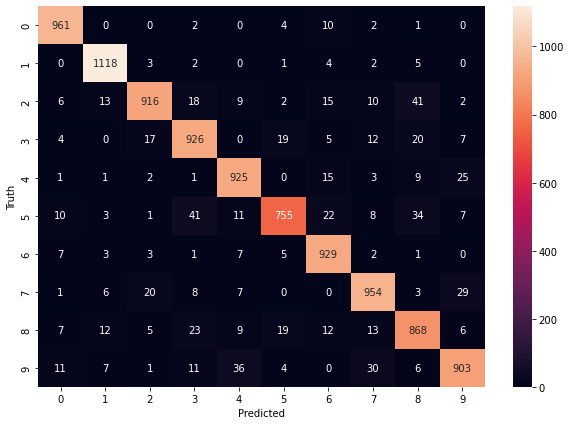

In [34]:
# To plot the confusion matrix in a better colorful way:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
# Till now we had a simple neural network where we don't have any hidden layers. Now let's create a hidden layer in a model.
# Hidden layers is mainly use to improve the model performace.
# Here in the first layer we can specify how many neuron we want in the next layer? there is no specified rule that how much 
# neurons are better, just as try and error we change the number and see the performace.
# When we have hidden layers our model will take some more training time.
# We can add more hidden layers.
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2728 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0504 - accuracy: 0.9839


In [38]:
# Now we want to evaluate the mode performance using test set:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9744


[0.08266163617372513, 0.974399983882904]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

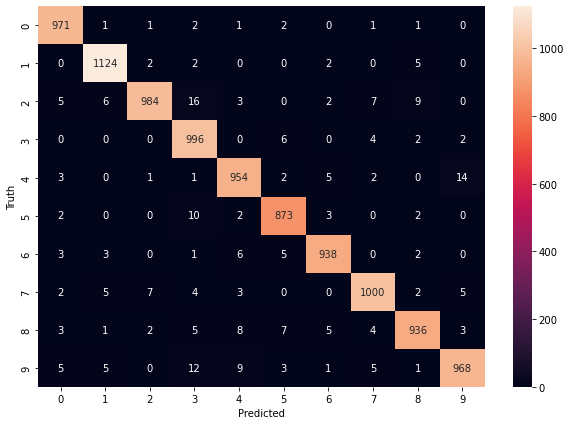

In [39]:
# Now you can compare both the results, when we don't have the hidden layers, we had 92% accuracy, but now with hidden 
# layer we have 97% accuracy. So it's good improvement.
# now let's again see the confusion matrix:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

* Now as we see in the confusion matrix that our model with hidden layers perform well and the number of errors are decreased.

In [40]:
# The next thing is, if you don't want to flatten your array, keras come with a function called 'flatten' which do the same for you.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2715 - accuracy: 0.9235
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1260 - accuracy: 0.9628
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9873
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9888
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9915


In [41]:
# Now as we increase the number of epochs, so the result is greater than previous. Let's check it on test data:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9747


[0.08708356320858002, 0.9746999740600586]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

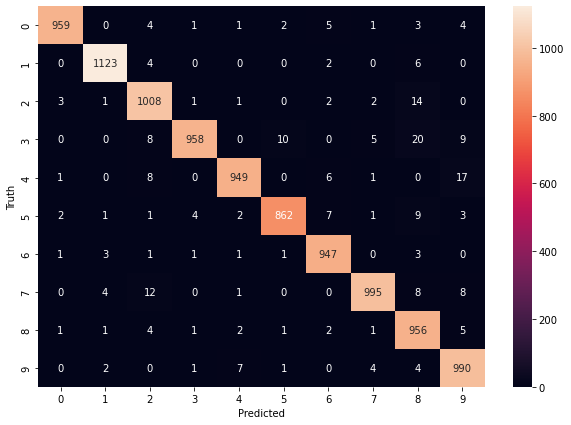

In [42]:
# Again if we see the confusion matrix:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Exercise
* Play with different parameters such activation function, hidden layers, optimizers and epochs numbers to get better accuracy then 97%.